# Basics [NumExpr]
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [basics_NumExpr.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/High-Performance-Computing/basics_NumExpr.ipynb)
- Spec: **CPU** i7-9750H 2.6 GHz **GPU** GeForce RTX 2060
---
Basic functions and operations using [NumExpr](https://numexpr.readthedocs.io/), *NumPy* and *Python*.

In [1]:
import numpy as np

# 0. Installation
---

Installation command for *anaconda* and *pip*:

```
$ conda install -c anaconda numexpr
```

or

```
$ pip install numexpr
```

In [2]:
import numexpr as ne

# 1. Evaluate
---
The string passed to **evaluate** is compiled into an object representing the expression and types of the arrays used by the function *numexpr*.

In [3]:
from time import time

In [4]:
def timeIt_numpy(a, b, runs, loops):
    output = np.zeros(runs)
    for r in range(runs):
        to = time()
        for _ in range(loops):
            current = 2*a**3 + 3*b**2
        ti = time()
        output[r] = ti - to
    return output

In [5]:
def timeIt_numexpr(a, b, runs, loops):
    output = np.zeros(runs)
    for r in range(runs):
        to = time()
        for _ in range(loops):
            current = ne.evaluate('2*a**3 + 3*b**2')
        ti = time()
        output[r] = ti - to
    return output

Lets compare the performance given vectors with different input sizes $N$.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

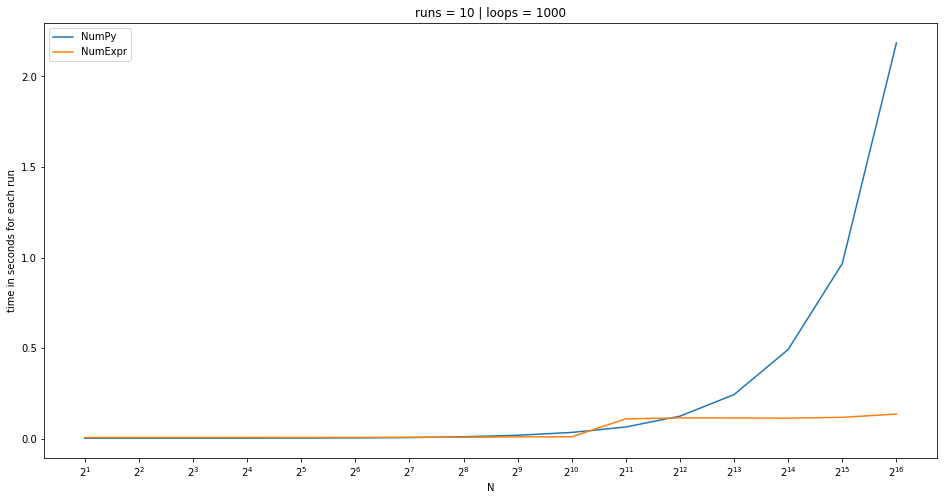

Wall time: 50.2 s


In [7]:
%%time
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

N = 16
runs = 10
loops = 1000
time_numpy = np.zeros((runs, N))
time_numexpr = np.zeros((runs, N))

# Time
for i in range(N):
    a = np.random.rand(2**(i + 1))
    b = np.random.rand(2**(i + 1))
    time_numpy[:,i] = timeIt_numpy(a, b, runs, loops)
    time_numexpr[:,i] = timeIt_numexpr(a, b, runs, loops)

# Plot
x = np.arange(N)
mu = np.mean(time_numpy, axis=0)
# std = np.std(time_numpy, axis=0)
ax.plot(mu, label="NumPy")
# ax.fill_between(x, mu - std, mu + std, alpha=0.2)

x = np.arange(N)
mu = np.mean(time_numexpr, axis=0)
# std = np.std(time_numexpr, axis=0)
ax.plot(mu, label="NumExpr")
# ax.fill_between(x, mu - std, mu + std, alpha=0.2)

ax.set_xlabel('N')
ax.set_xticks(x)
ax.set_xticklabels([f'$2^{{{e + 1}}}$'for e in range(N)])
ax.set_ylabel('time in seconds for each run')

ax.set_title(f'runs = {runs} | loops = {loops}')
ax.legend()

plt.show()